In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [4]:
shopify_ds = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv", parse_dates = ['created_at'])
shopify_ds

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [5]:
shopify_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [14]:
shopify_ds['order_amount'].mean()

3145.128

In [13]:
shopify_ds['user_id'].nunique()

301

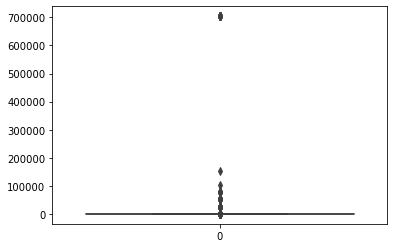

In [24]:
sns.boxplot(data = data)

Looks like there are a lot of outliers that are affecting the average order value. Lets find out those.

In [28]:
data = shopify_ds['order_amount']

# Function to Detect Outliers
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print("Lower Limit:", lower_limit)
    print("Upper Limit:", upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

outliers = find_anomalies(data)
print("Outliers:", outliers)

Lower Limit: -120690.10466525992
Upper Limit: 126980.36066525991
Outliers: [704000, 704000, 704000, 154350, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000]


Any value that is beyond 3 standard deviations from the mean is an outlier. Above we have a list of order amounts that fall in the outlier region and because of them the AOV is high for an affordable product like shoes.

In [30]:
shopify_ds.loc[shopify_ds['order_amount'].isin(outliers)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00


Interesting findings here. <br>
- All of the outliers amounts are transactions done by two specific users.
- They are buying shoes in bulk; 2000 pairs of shoes by user_id 607 and 6 pairs of shoes by user_id 878 which is shooting up the AOV.

b.	What metric would you report for this dataset?

- Median is the metric which should be used to report for this dataset because it is not affected by outliers.

c.	What is its value?

In [34]:
np.median(shopify_ds['order_amount'])

284.0

# Question 2: Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?

SELECT COUNT(OrderID) <br>
FROM Orders O, Shippers S <br>
WHERE O.ShipperID = S.ShipperID AND S.ShipperName = 'Speedy Express' <br>

Ans - 54

b.	What is the last name of the employee with the most orders?

SELECT e.LastName, count(*) as Most_Orders <br>
FROM Employees e, Orders o <br>
WHERE e.EmployeeID = o.EmployeeID <br>
GROUP BY e.LastName <br>
ORDER BY Most_Orders DESC LIMIT 1 <br>

Ans - 40 orders by the employee whose last name is Peacock was the highest.

c.	What product was ordered the most by customers in Germany?

SELECT p.ProductName, SUM(Quantity) <br>
FROM Customers c, OrderDetails od, Orders o, Products p <br>
WHERE c.CustomerID = o.CustomerID AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.Country = "Germany" <br>
GROUP BY p.ProductID <br>
ORDER BY SUM(Quantity) DESC LIMIT 1 <br>

Ans - Boston Crab Meat, quantity = 160